<a href="https://colab.research.google.com/github/sayanarajasekhar/PyTorch/blob/main/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

Importing libraries

In [62]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Creating device agonistic code

In [63]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.

* For consistency, the dataset should have `1000` samples and a `random_state`=42.
* Turn the data into PyTorch tensors. Split the data into training and test sets using `train_test_split` with `80%` training and `20%` testing.


### 1. Create and split train test data

In [64]:
# Import make_moons from sklearn
from sklearn.datasets import make_moons

# Create 1000 samples
n_samples = 1000

X, y = make_moons(n_samples = n_samples,
                  noise = 0.03,
                  random_state = 42)

print(len(X), len(y))

# Splitting train test data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

1000 1000
800 200 800 200


In [65]:
X_train[0], y_train[0]

(array([1.97580347, 0.20764306]), np.int64(1))

### 2. Plot and visualize data using matplotlib

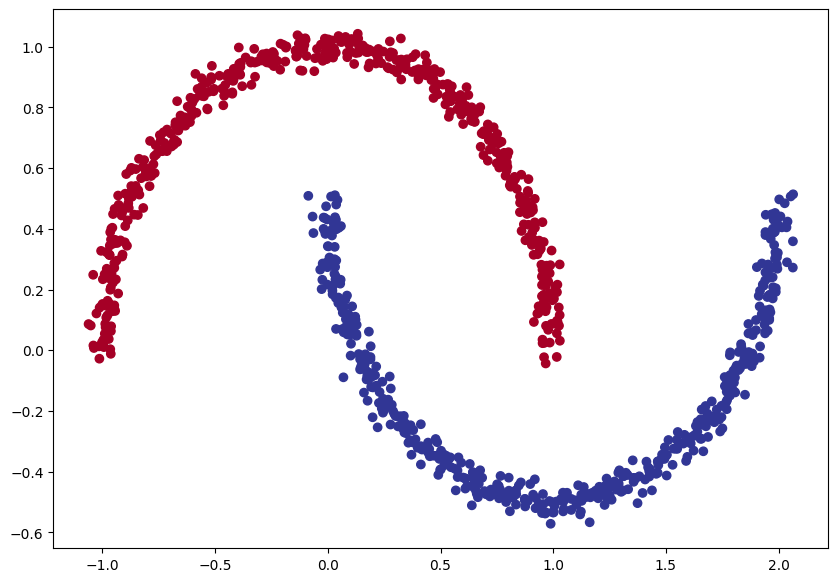

In [66]:
plt.figure(figsize = (10, 7))
plt.scatter(x = X[:,0],
            y = X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu)

### 3. Convert the data to tensors

In [67]:
X_train = torch.from_numpy(X_train).type(torch.float).to(device)
y_train = torch.from_numpy(y_train).type(torch.float).to(device)
X_test = torch.from_numpy(X_test).type(torch.float).to(device)
y_test = torch.from_numpy(y_test).type(torch.float).to(device)

X_train.type, X_train.dtype, y_test.dtype

(<function Tensor.type>, torch.float32, torch.float32)

### 4. Create binary classification model

In [68]:
class MakeMoons(nn.Module):
  def __init__(self):
    super().__init__()
    self.linearLayers = nn.Sequential(
        nn.Linear(in_features = 2, out_features = 10),
        nn.ReLU(),
        nn.Linear(in_features = 10, out_features = 10),
        nn.ReLU(),
        nn.Linear(in_features = 10, out_features = 1)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linearLayers(x)

In [69]:
torch.manual_seed(42)
model_0 = MakeMoons()
model_0

MakeMoons(
  (linearLayers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

### 5. Create loss function and optimizer

In [70]:
# Loss Function
loss_fn = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

### 6. Train model

In [71]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [72]:
epochs = 1000

for epoch in range(epochs):
  ### Train
  model_0.train()

  # 1. Forward pass
  train_logits = model_0(X_train).squeeze()
  train_preds = torch.sigmoid(train_logits).round()

  # 2. Calculate loss
  train_loss = loss_fn(train_logits, y_train)
  train_acc = accuracy_fn(y_true = y_train,
                          y_pred = train_preds)

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. loss backward
  train_loss.backward()

  # 5. Optimize step
  optimizer.step()

  ### Test
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.sigmoid(test_logits).round()

    # 2. Calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f} Acc: {test_acc:.2f}%")


Epoch: 0 | Train Loss: 0.69537 Acc: 37.75% | Test Loss: 0.69457 Acc: 49.50%
Epoch: 100 | Train Loss: 0.38636 Acc: 81.88% | Test Loss: 0.40196 Acc: 77.00%
Epoch: 200 | Train Loss: 0.23664 Acc: 88.62% | Test Loss: 0.23758 Acc: 90.00%
Epoch: 300 | Train Loss: 0.19082 Acc: 91.38% | Test Loss: 0.18528 Acc: 92.50%
Epoch: 400 | Train Loss: 0.15147 Acc: 93.75% | Test Loss: 0.14452 Acc: 94.00%
Epoch: 500 | Train Loss: 0.10692 Acc: 95.62% | Test Loss: 0.09974 Acc: 97.50%
Epoch: 600 | Train Loss: 0.06902 Acc: 98.50% | Test Loss: 0.06298 Acc: 99.00%
Epoch: 700 | Train Loss: 0.04417 Acc: 99.75% | Test Loss: 0.03936 Acc: 99.50%
Epoch: 800 | Train Loss: 0.03007 Acc: 100.00% | Test Loss: 0.02625 Acc: 100.00%
Epoch: 900 | Train Loss: 0.02188 Acc: 100.00% | Test Loss: 0.01887 Acc: 100.00%


### 7. Visualize

In [72]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary